In [2]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt

In [40]:
df_oxid = pd.read_csv('Oxid_000.csv')
df_etch = pd.read_csv('Etching_000.csv')

- 이상치 Outlier 

1. IQR (Inter Qunatile Range, 사분범위) : 데이터를 오름차순으로 정렬한 뒤, 1/4 나누어, 전체 데이터의 50%데이터가 몰려있는 구간을 선택 
    - 25%구간(1사분위수) 또는 75%구간(3사분위수)에서 IQR x 1.5 배 이상 떨어진 데이터를 이상치로 판단 
2. 표준편차 6배 (ESD) : 평균으로부터 각각 표준편차가 3배 떨어진 구간 
3. 비즈니스 상 이상치라고 판단되는 값들(공정 상 절대 나올 수 없는 값들)

<AxesSubplot:xlabel='Oxid_time'>

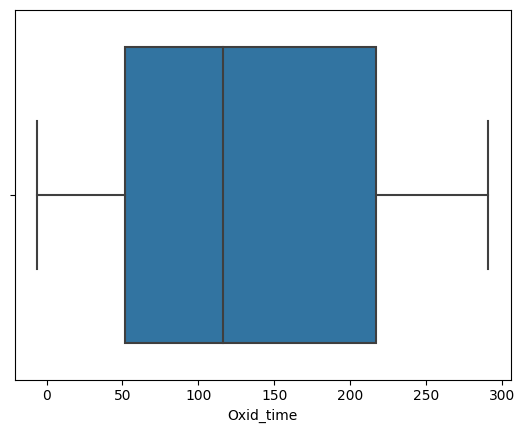

In [41]:
sns.boxplot(df_oxid, x="Oxid_time")

In [42]:
cond1=df_oxid['Oxid_time']<0
df_oxid.loc[cond1]

,Ox_Chamber,process,type,Temp_OXid,Vapor,ppm,Pressure,Oxid_time,thickness,No_Die,Lot_Num,Wafer_Num,Datetime
220,3,Oxidation,dry,1190.831353,O2,35.47,0.207,-5,700.396,NOLSM22195,9,5,17-02-2019 PM 9:04:30
248,3,Oxidation,dry,1140.375541,O2,34.12,0.214,-5,721.300,NOLSM249106,10,6,17-02-2019 PM 9:04:30
333,1,Oxidation,dry,978.149281,O2,35.26,0.202,-2,687.497,NOLSM3341310,13,10,17-02-2019 PM 9:04:30
358,1,Oxidation,dry,1091.609203,O2,35.15,0.211,-6,703.879,NOLSM359148,14,8,17-02-2019 PM 9:04:30
761,2,Oxidation,wet,1268.333781,H2O,44.53,0.191,-2,686.530,NOLSM762296,29,6,17-02-2019 PM 9:04:30
762,2,Oxidation,wet,1274.752189,H2O,44.62,0.187,-6,691.168,NOLSM763297,29,7,17-02-2019 PM 9:04:30


In [43]:
df_oxid[cond1]

,Ox_Chamber,process,type,Temp_OXid,Vapor,ppm,Pressure,Oxid_time,thickness,No_Die,Lot_Num,Wafer_Num,Datetime
220,3,Oxidation,dry,1190.831353,O2,35.47,0.207,-5,700.396,NOLSM22195,9,5,17-02-2019 PM 9:04:30
248,3,Oxidation,dry,1140.375541,O2,34.12,0.214,-5,721.300,NOLSM249106,10,6,17-02-2019 PM 9:04:30
333,1,Oxidation,dry,978.149281,O2,35.26,0.202,-2,687.497,NOLSM3341310,13,10,17-02-2019 PM 9:04:30
358,1,Oxidation,dry,1091.609203,O2,35.15,0.211,-6,703.879,NOLSM359148,14,8,17-02-2019 PM 9:04:30
761,2,Oxidation,wet,1268.333781,H2O,44.53,0.191,-2,686.530,NOLSM762296,29,6,17-02-2019 PM 9:04:30
762,2,Oxidation,wet,1274.752189,H2O,44.62,0.187,-6,691.168,NOLSM763297,29,7,17-02-2019 PM 9:04:30


In [44]:
df_oxid['Oxid_time(outlier)']=df_oxid['Oxid_time']
cond1=df_oxid['Oxid_time(outlier)']<0
# 값 대체해주는 loc
# 일반 불린인덱싱 사용하면 대체 안되니 참고
df_oxid.loc[cond1,'Oxid_time(outlier)']=np.nan
df_oxid[cond1]

,Ox_Chamber,process,type,Temp_OXid,Vapor,ppm,Pressure,Oxid_time,thickness,No_Die,Lot_Num,Wafer_Num,Datetime,Oxid_time(outlier)
220,3,Oxidation,dry,1190.831353,O2,35.47,0.207,-5,700.396,NOLSM22195,9,5,17-02-2019 PM 9:04:30,NaN
248,3,Oxidation,dry,1140.375541,O2,34.12,0.214,-5,721.300,NOLSM249106,10,6,17-02-2019 PM 9:04:30,NaN
333,1,Oxidation,dry,978.149281,O2,35.26,0.202,-2,687.497,NOLSM3341310,13,10,17-02-2019 PM 9:04:30,NaN
358,1,Oxidation,dry,1091.609203,O2,35.15,0.211,-6,703.879,NOLSM359148,14,8,17-02-2019 PM 9:04:30,NaN
761,2,Oxidation,wet,1268.333781,H2O,44.53,0.191,-2,686.530,NOLSM762296,29,6,17-02-2019 PM 9:04:30,NaN
762,2,Oxidation,wet,1274.752189,H2O,44.62,0.187,-6,691.168,NOLSM763297,29,7,17-02-2019 PM 9:04:30,NaN


In [45]:
#원 컬럼(oxid_time)은 min : -6 / 변환 컬럼은 min : 0
df_oxid.describe()

,Ox_Chamber,Temp_OXid,ppm,Pressure,Oxid_time,thickness,Lot_Num,Wafer_Num,Oxid_time(outlier)
count,852.00000,852.000000,852.000000,852.000000,852.000000,852.000000,852.000000,852.000000,846.000000
mean,2.00000,1064.415784,33.202242,0.211374,123.201878,710.926810,16.281690,13.894366,124.106383
std,0.81265,149.550147,8.494070,0.009067,76.285130,8.082856,9.116841,7.785951,75.791886
min,1.00000,862.011276,21.070000,0.180000,-6.000000,681.435000,1.000000,1.000000,0.000000
25%,1.00000,874.756813,22.450000,0.205000,52.000000,706.313000,8.000000,7.000000,56.000000
50%,2.00000,1069.240209,33.420000,0.213000,116.000000,711.590500,16.000000,14.000000,116.500000
75%,3.00000,1189.172249,40.452500,0.217000,217.000000,715.595000,24.000000,21.000000,217.750000
max,3.00000,1339.476675,49.910000,0.229000,291.000000,737.402000,32.000000,27.000000,291.000000


In [46]:
q1=df_oxid['Oxid_time(outlier)'].quantile(0.25)
q3=df_oxid['Oxid_time(outlier)'].quantile(0.75)
iqr=(q3-q1)*1.5
iqr

242.625

In [47]:
cond1=df_oxid['Oxid_time(outlier)']> q3+iqr
cond2=df_oxid['Oxid_time(outlier)']< q1-iqr

df_oxid.loc[cond1 | cond2, 'Oxid_time(outlier)']=np.nan

<AxesSubplot:xlabel='Oxid_time(outlier)'>

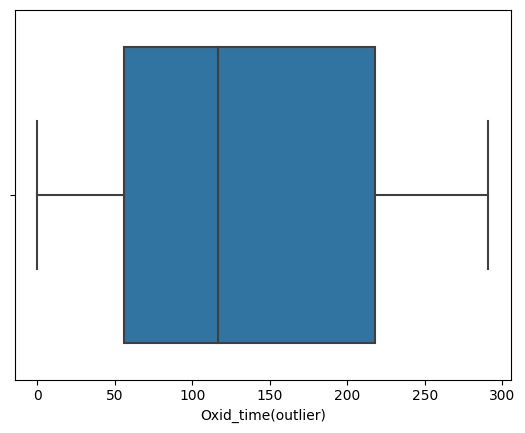

In [48]:
sns.boxplot(df_oxid, x='Oxid_time(outlier)')

In [50]:
df_etch.describe()

,Unnamed: 0,Etching_Chamber,Temp_Etching,Source_Power,Selectivity,Lot_Num,Wafer_Num,Thin Film 4,Thin Film 3,Thin Film 2,Thin Film 1
count,852.00000,852.000000,852.000000,852.000000,852.000000,852.000000,852.000000,851.000000,851.000000,851.000000,851.000000
mean,425.50000,1.967136,71.147822,51.227459,1.032140,16.281690,13.894366,296.633373,311.276439,347.799401,404.940012
std,246.09551,0.830584,0.824158,0.634215,0.016238,9.116841,7.785951,125.378446,125.714630,125.774630,125.790535
min,0.00000,1.000000,68.150000,49.342000,0.984000,1.000000,1.000000,-49.000000,-34.650000,2.000000,59.380000
25%,212.75000,1.000000,70.709750,50.794500,1.022000,8.000000,7.000000,202.000000,216.525000,252.880000,310.185000
50%,425.50000,2.000000,71.220500,51.247000,1.033500,16.000000,14.000000,281.000000,295.970000,332.480000,389.630000
75%,638.25000,3.000000,71.656500,51.698250,1.043000,24.000000,21.000000,372.000000,386.675000,423.050000,480.355000
max,851.00000,3.000000,73.081000,53.272000,1.076000,32.000000,27.000000,687.000000,700.240000,736.510000,793.500000


In [52]:
df_etch['Thin Film 4(outlier)']=df_etch['Thin Film 4']
cond1=df_etch['Thin Film 4(outlier)']<0
df_etch.loc[cond1, 'Thin Film 4(outlier)']=np.nan

df_etch['Thin Film 3(outlier)']=df_etch['Thin Film 3']
cond1=df_etch['Thin Film 3(outlier)']<0
df_etch.loc[cond1, 'Thin Film 3(outlier)']=np.nan

df_etch.describe()

,Unnamed: 0,Etching_Chamber,Temp_Etching,Source_Power,Selectivity,Lot_Num,Wafer_Num,Thin Film 4,Thin Film 3,Thin Film 2,Thin Film 1,Thin Film 4(outlier),Thin Film 3(outlier)
count,852.00000,852.000000,852.000000,852.000000,852.000000,852.000000,852.000000,851.000000,851.000000,851.000000,851.000000,848.000000,848.000000
mean,425.50000,1.967136,71.147822,51.227459,1.032140,16.281690,13.894366,296.633373,311.276439,347.799401,404.940012,297.814858,312.458125
std,246.09551,0.830584,0.824158,0.634215,0.016238,9.116841,7.785951,125.378446,125.714630,125.774630,125.790535,124.009359,124.349720
min,0.00000,1.000000,68.150000,49.342000,0.984000,1.000000,1.000000,-49.000000,-34.650000,2.000000,59.380000,13.000000,27.170000
25%,212.75000,1.000000,70.709750,50.794500,1.022000,8.000000,7.000000,202.000000,216.525000,252.880000,310.185000,203.000000,217.532500
50%,425.50000,2.000000,71.220500,51.247000,1.033500,16.000000,14.000000,281.000000,295.970000,332.480000,389.630000,282.000000,296.695000
75%,638.25000,3.000000,71.656500,51.698250,1.043000,24.000000,21.000000,372.000000,386.675000,423.050000,480.355000,372.250000,387.002500
max,851.00000,3.000000,73.081000,53.272000,1.076000,32.000000,27.000000,687.000000,700.240000,736.510000,793.500000,687.000000,700.240000
